In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd())
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Distgen Check

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_xy:
    units: micrometer
    value: 100.0
  type: rsg
random_type: hammersley
species: electron
start:
  MTE:
    units: millielectron_volt
    value: 5.0
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: picosecond
    value: 10.0
  type: sg
total_charge:
  units: nanocoulomb
  value: 5.0
transforms: null

>


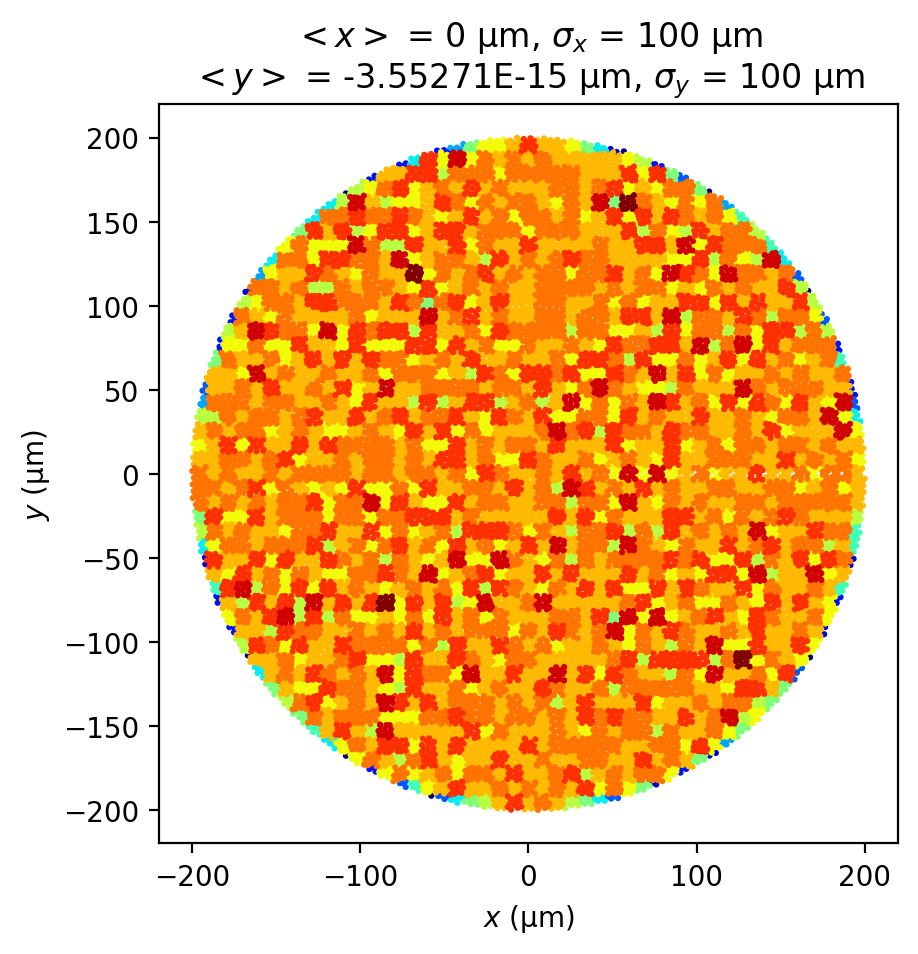

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE)
print(gen)
beam = gen.beam()

plot_dist2d(beam,'x', 'um', 'y', 'um', axis='equal', title_on=True);

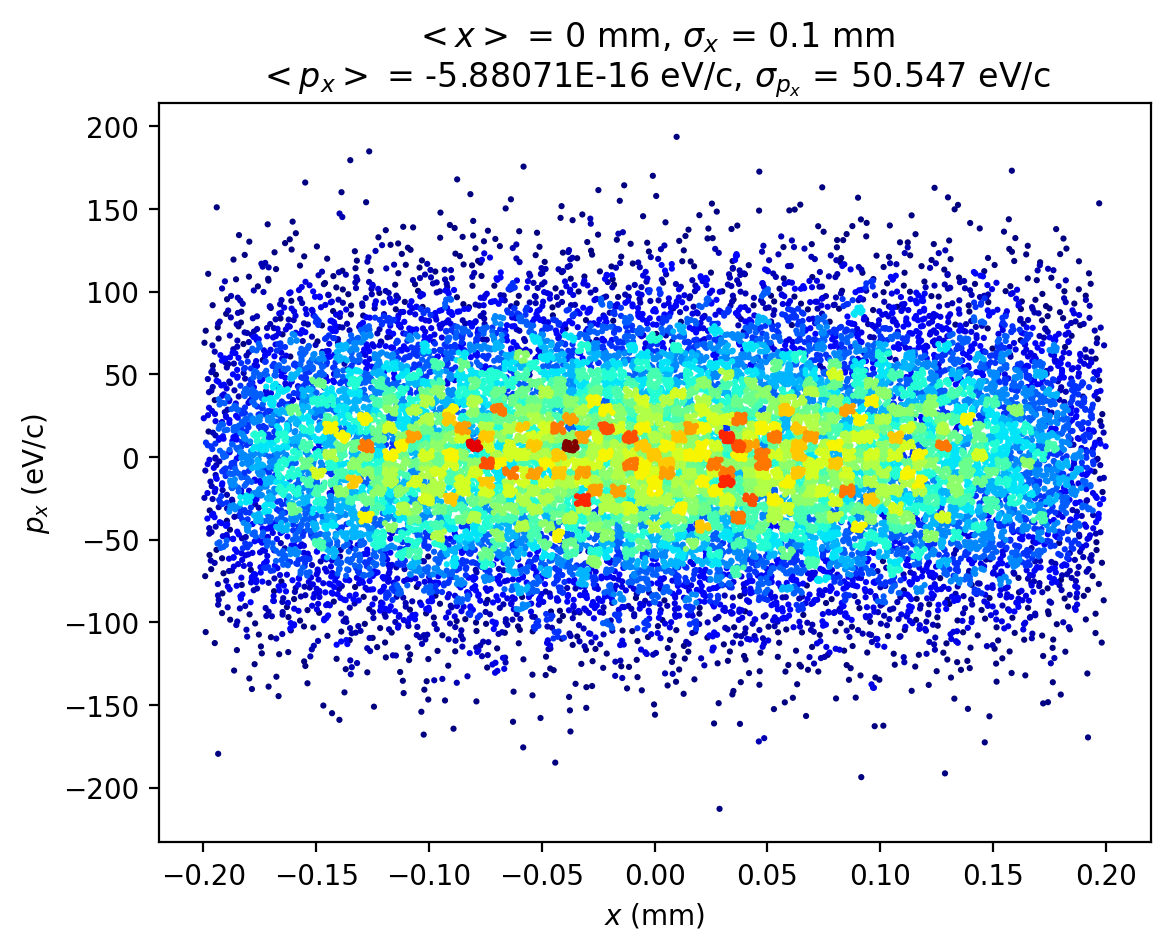

In [3]:
plot_dist2d(beam,'x', 'mm', 'px', 'eV/c', nbins=75, title_on=True);

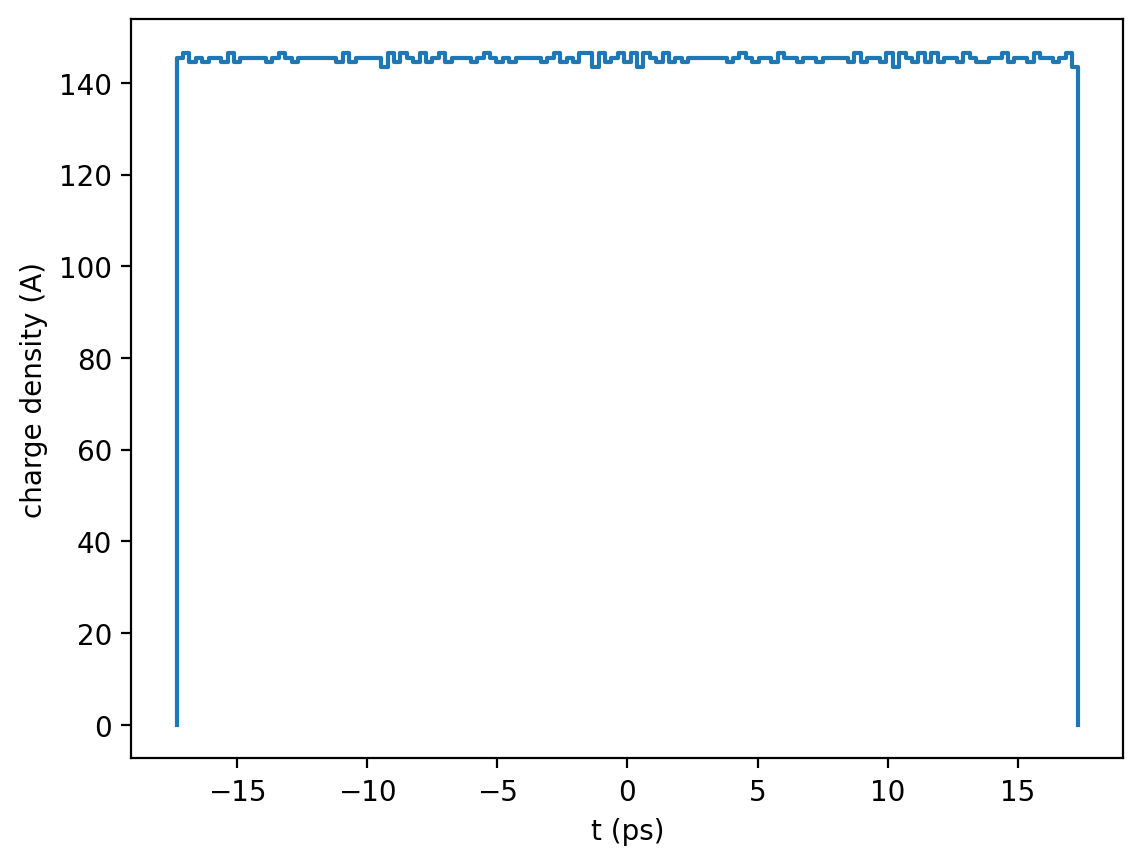

In [4]:
plot_current_profile(beam, 'ps', 'A')

# Run GPT with Distgen

Its often useful to run the GPT input file without setting anything, just to make sure there are no syntax errors in the file.  

In [5]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [6]:
GPT_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')

PC1 = 1000
PC2 = 1000

settings={'n_particle':200, 
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True)
print(G)

Run GPT with Distgen:
n_particle is in distgen
Replacing param n_particle with value 200
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmp_ern6bca/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 10 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 50.547 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, 

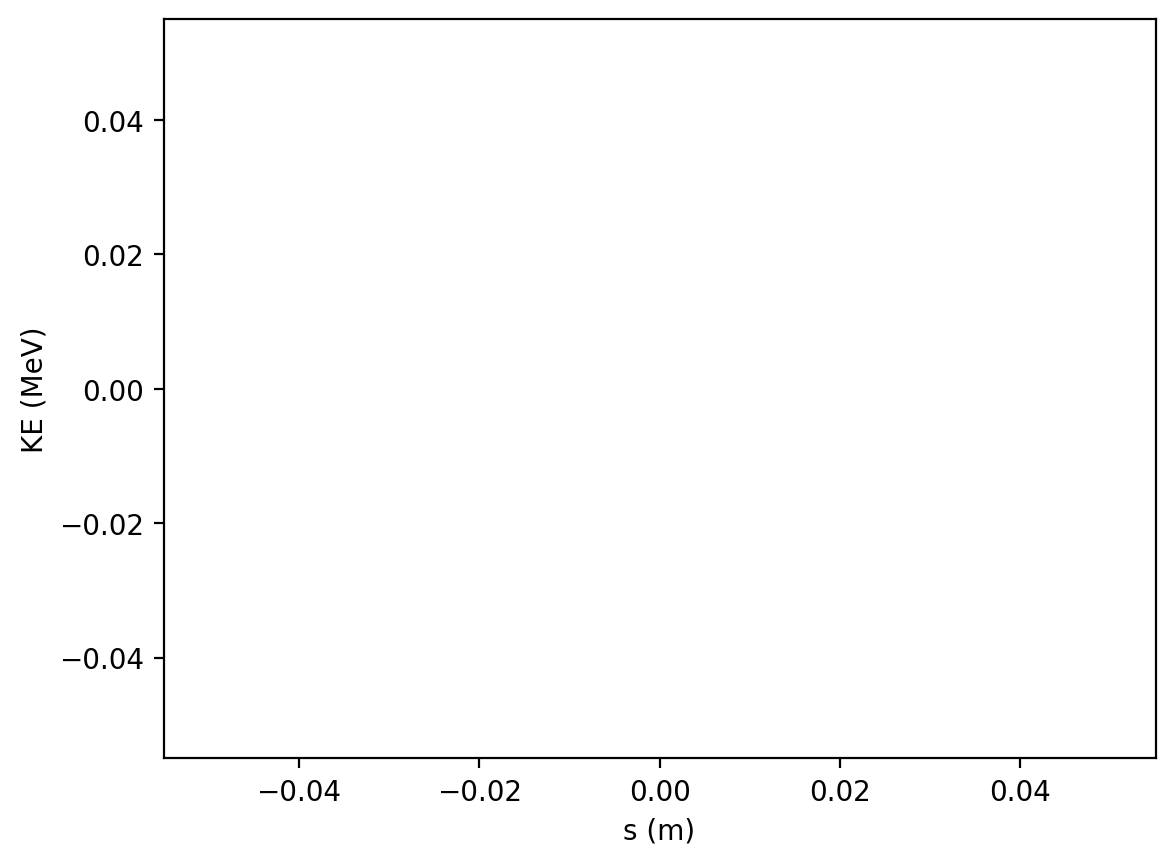

In [7]:
fig, ax = plt.subplots()
ax.plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6)
ax.set_xlabel(f's (m)');
ax.set_ylabel(f'KE (MeV)');

# Run GPT with Distgen and energy gain cavity auto phasing


In [8]:
PC1 = 79e6
PC2 = 79e6

settings={'n_particle':2000, 
          'space_charge':1,
          't_dist:sigma_t:value':10,
          't_dist:sigma_t:units': 'ps',
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         auto_phase=True,
                         verbose=True,
                         gpt_verbose=False)

print(G)

Run GPT with Distgen:
n_particle is in distgen
Replacing param n_particle with value 2000
space_charge is in gpt
t_dist:sigma_t:value is in distgen
Replacing param t_dist:sigma_t:value with value 10
t_dist:sigma_t:units is in distgen
Replacing param t_dist:sigma_t:units with value ps
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpzlo4uzyk/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 2000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 10 ps, power = INF
   px

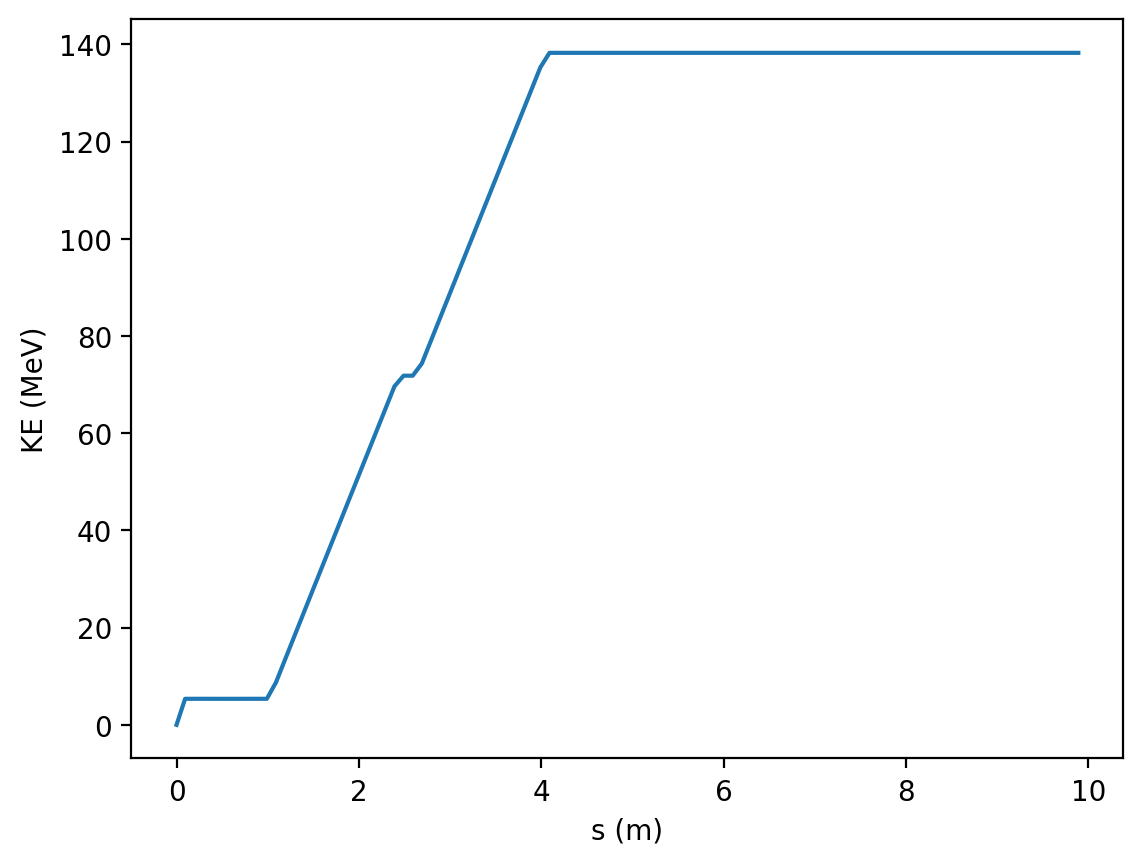

In [9]:
fig, ax = plt.subplots()
ax.plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6)
ax.set_xlabel(f's (m)');
ax.set_ylabel(f'KE (MeV)');

In [10]:
from gpt.gpt_distgen import evaluate_gpt_with_distgen

result = evaluate_gpt_with_distgen(settings=settings,
                                   gpt_input_file=GPT_INPUT_FILE,
                                   distgen_input_file=DISTGEN_INPUT_FILE,
                                   verbose=True,
                                   auto_phase=True)

Run GPT with Distgen:
n_particle is in distgen
Replacing param n_particle with value 2000
space_charge is in gpt
t_dist:sigma_t:value is in distgen
Replacing param t_dist:sigma_t:value with value 10
t_dist:sigma_t:units is in distgen
Replacing param t_dist:sigma_t:units with value ps
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpytvjdzfj/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 2000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 10 ps, power = INF
   px

In [11]:
result

{'error': False,
 'end_n_particle': 1073,
 'end_norm_emit_x': np.float64(9.976304069400337e-05),
 'end_norm_emit_y': np.float64(9.88773211626487e-05),
 'end_higher_order_energy_spread': np.float64(181487.0154766077),
 'end_mean_x': np.float64(-4.477048180908478e-05),
 'end_sigma_x': np.float64(0.005927173227674762),
 'end_min_x': np.float64(-0.013679386184749117),
 'end_max_x': np.float64(0.013856439202641143),
 'end_mean_y': np.float64(-7.755056723192608e-05),
 'end_sigma_y': np.float64(0.005916848304138051),
 'end_min_y': np.float64(-0.01407074248925764),
 'end_max_y': np.float64(0.0145244410235044),
 'end_mean_z': np.float64(4.254172397058824),
 'end_sigma_z': np.float64(3.6478724390135086e-16),
 'end_min_z': np.float64(4.254172397058823),
 'end_max_z': np.float64(4.2541723970588246),
 'end_mean_r': np.float64(0.007445953253989485),
 'end_sigma_r': np.float64(0.003834876132415309),
 'end_min_r': np.float64(9.862285167869502e-05),
 'end_max_r': np.float64(0.014709470877282098),
 'end